In [1]:
from matplotlib import pyplot as plt
import foolbox
import keras
import numpy as np
from keras.applications.resnet50 import ResNet50

Using TensorFlow backend.


In [2]:
# instantiate model
keras.backend.set_learning_phase(0)
kmodel = ResNet50(weights='imagenet')
preprocessing = (np.array([104, 116, 123]), 1)
fmodel = foolbox.models.KerasModel(kmodel, bounds=(0, 255), preprocessing=preprocessing)

102858752/102853048 [==============================] - 23s 0us/step


In [3]:
# get source image and label
image, label = foolbox.utils.imagenet_example()

In [4]:
# apply attack on source image
# ::-1 reverses the color channels, because Keras ResNet50 expects BGR instead of RGB
attack = foolbox.attacks.FGSM(fmodel)

In [5]:
adversarial = attack(image[:, :, ::-1], label)
# if the attack fails, adversarial will be None and a warning will be printed

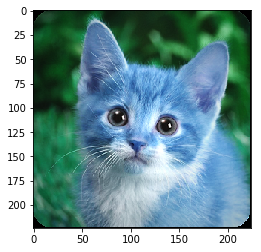

In [6]:
plt.imshow(adversarial/255)